# Variability Statistics for raw Forced Photometry lightcurves  in  g00_21.csv 

A  notebook to plot the results of full analysis on single patch-file g00_21.csv , in an effort to clean-up S13Agg_first_look, and facilitate easier reproducibility 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

## varMetricsFull : stats on full unbinned LC , 1000 bootstraps

In [8]:

Dir =  '/astro/store/scratch/tmp/suberlak/s13_stripe82/forced_phot_lt_23/NCSA/Var/'
File = 'Vari00_21.csv'
varMetricsFull = pd.read_csv(Dir+File)

varMetricsFull.columns

Index([u'objectId', u'N', u'avgMJD', u'chi2DOF', u'chi2R', u'flagLtTenPts',
       u'muFull', u'psfFluxMean', u'psfFluxMeanErr', u'psfFluxMedian',
       u'psfFluxMedianErr', u'psfFluxSigG', u'psfFluxSkew', u'psfFluxStDev',
       u'rangeMJD', u'sigmaFull', u'psfMean', u'psfMedian', u'psfMeanErr',
       u'psfMedianErr'],
      dtype='object')

In [9]:
varMetricsFull

,objectId,N,avgMJD,chi2DOF,chi2R,flagLtTenPts,muFull,psfFluxMean,psfFluxMeanErr,psfFluxMedian,psfFluxMedianErr,psfFluxSigG,psfFluxSkew,psfFluxStDev,rangeMJD,sigmaFull,psfMean,psfMedian,psfMeanErr,psfMedianErr
0,216172782516437336,72.0,53771.956525,1.577766,0.989576,NaN,0.037758,3.720096e-29,1.198726e-30,3.912928e-29,1.502380e-30,1.033519e-29,0.0,1.158416e-29,2602.880267,0.004257,22.473615,22.418745,0.034986,0.041687
1,216172782516437339,72.0,53771.956525,1.577766,0.989576,NaN,0.037695,3.720096e-29,1.198726e-30,3.912928e-29,1.502380e-30,1.033519e-29,0.0,1.158416e-29,2602.880267,0.004215,22.473615,22.418745,0.034986,0.041687
2,216172782516437345,72.0,53771.956525,1.577766,0.989576,NaN,0.037648,3.720096e-29,1.198726e-30,3.912928e-29,1.502380e-30,1.033519e-29,0.0,1.158416e-29,2602.880267,0.004301,22.473615,22.418745,0.034986,0.041687
3,216172782516437346,72.0,53771.956525,1.577766,0.989576,NaN,0.037734,3.720096e-29,1.198726e-30,3.912928e-29,1.502380e-30,1.033519e-29,0.0,1.158416e-29,2602.880267,0.004347,22.473615,22.418745,0.034986,0.041687
4,216172782516437358,72.0,53771.956525,1.577766,0.989576,NaN,0.037687,3.720096e-29,1.198726e-30,3.912928e-29,1.502380e-30,1.033519e-29,0.0,1.158416e-29,2602.880267,0.004219,22.473615,22.418745,0.034986,0.041687
5,216172782516437360,72.0,53771.956525,1.577766,0.989576,NaN,0.037689,3.720096e-29,1.198726e-30,3.912928e-29,1.502380e-30,1.033519e-29,0.0,1.158416e-29,2602.880267,0.004260,22.473615,22.418745,0.034986,0.041687
6,216172782516437362,72.0,53771.956525,1.577766,0.989576,NaN,0.037671,3.720096e-29,1.198726e-30,3.912928e-29,1.502380e-30,1.033519e-29,0.0,1.158416e-29,2602.880267,0.004235,22.473615,22.418745,0.034986,0.041687
7,216172782516437371,72.0,53771.956525,1.577766,0.989576,NaN,0.037687,3.720096e-29,1.198726e-30,3.912928e-29,1.502380e-30,1.033519e-29,0.0,1.158416e-29,2602.880267,0.004284,22.473615,22.418745,0.034986,0.041687
8,216172782516437379,72.0,53771.956525,1.577766,0.989576,NaN,0.037673,3.720096e-29,1.198726e-30,3.912928e-29,1.502380e-30,1.033519e-29,0.0,1.158416e-29,2602.880267,0.004345,22.473615,22.418745,0.034986,0.041687
9,216172782516437381,72.0,53771.956525,1.577766,0.989576,NaN,0.037630,3.720096e-29,1.198726e-30,3.912928e-29,1.502380e-30,1.033519e-29,0.0,1.158416e-29,2602.880267,0.004220,22.473615,22.418745,0.034986,0.041687


In [5]:
np.sum(varMetricsFull['N'].values < 55 )

0

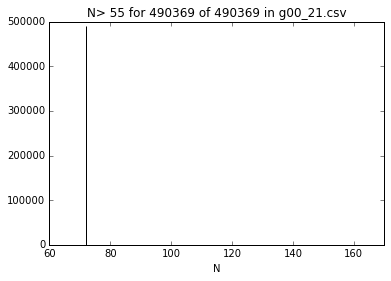

In [6]:
%matplotlib inline
xMin = 55
m = varMetricsFull['N'] > xMin
plt.hist(varMetricsFull['N'][m], bins=100)
plt.title('N> %d for %d of %d in g00_21.csv'%(xMin, np.sum(m),len(m) ))
plt.xlim(60,170)
plt.xlabel('N')
#plt.savefig('Varg00_21_1000_bootstraps_hist_N.png')

In [6]:
hist, bin_edges = np.histogram(varMetricsFull['N'][varMetricsFull['N'].values> 55].values, bins=np.arange(56,163), density=False)
bin_cen = (bin_edges[:-1] + bin_edges[1:])/2



In [7]:
len(varMetricsFull['N'][varMetricsFull['N'].values> 55].values)

489320

In [8]:
# time_hist is in miliseconds 
N = [72,144]
time = [9.02, 15.9]  
p = np.polyfit(N,time,deg=1)
time_hist = p[0] + p[1] * bin_cen
ttl_time = np.sum(hist*time_hist) / (1000 * 60 * 60 )
print('For 1000 bootstraps it took %.2f hours' % ttl_time)
# thus I get that it roughly took  22.85 hours with  N = 1000 bootstraps.... 

N = [72,144]
time = [62.2, 122]
p = np.polyfit(N,time,deg=1)
time_hist = p[0] + p[1] * bin_cen
ttl_time = np.sum(hist*time_hist) / (1000 * 60 * 60 )
print('For 10000 bootstraps it took %.2f hours' % ttl_time)

For 1000 bootstraps it took 23.47 hours
For 10000 bootstraps it took 26.42 hours


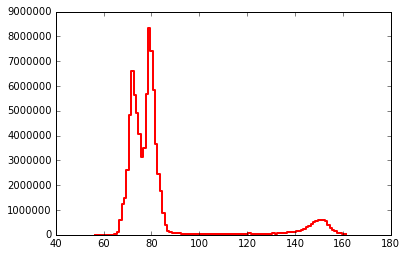

In [9]:
# N pts per lightcurve and time of calculation for N=1000 bootstraps
N = [72,144]
time = [9.02, 15.9]
p = np.polyfit(N,time,deg=1)
time_hist = p[0] + p[1] * bin_cen
fig,ax = plt.subplots()
#ax.plot(bin_cen, time_hist, color = 'blue', ls='steps', lw=2)
ax.plot(bin_cen, hist*time_hist, color='red', ls='steps', lw=2)

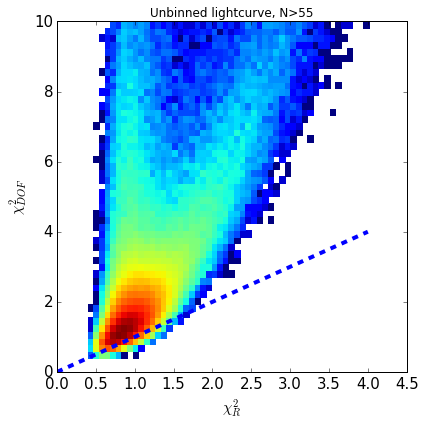

In [50]:
%matplotlib inline
# Plot some results : full LC : 
fig, ax = plt.subplots(figsize=(6,6))
xMin = 55
m4 = varMetricsFull['N'].values  > xMin
lim = 10
m1=varMetricsFull[m4]['chi2R'].values<lim
m2=varMetricsFull[m4]['chi2DOF'].values<lim
m= m1*m2  # logical and 

H, xedges, yedges = np.histogram2d(varMetricsFull[m4]['chi2R'].values[m],varMetricsFull[m4]['chi2DOF'].values[m], bins=50)
H = np.rot90(H)
H = np.flipud(H)
# Mask zeros
Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zeropltssssss
# Plot 2D histogram using pcolor
ax.pcolormesh(xedges,yedges,np.log10(Hmasked), cmap='jet')
ax.plot(np.linspace(0,4), np.linspace(0,4), ls='--', lw=4)
ax.set_xlabel(r'$\chi^{2}_{R}$', fontsize=15)
ax.set_ylabel(r'$\chi^{2}_{DOF}$', fontsize=15)
ax.set_title('Unbinned lightcurve, N>%d'%xMin)
#ax.set_xlim(0,lim)
#ax.set_ylim(0,lim)
ax.tick_params(axis='both', which='major', labelsize=15) 
plt.tight_layout()
plt.savefig('Varg00_21_1000_bootstraps_Chi2R_vs_Chi2DOF_yMax_10.png')

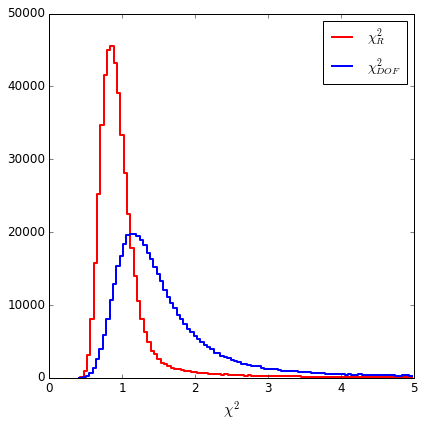

In [11]:
%matplotlib inline 

fig,ax = plt.subplots(1,1 , figsize=(6,6))

nbins=100

nMin = 55
m4 = varMetricsFull['N'].values  > nMin

chi2Rlim = 5
m=varMetricsFull[m4]['chi2R'].values< chi2Rlim
hist, bin_edges = np.histogram(varMetricsFull[m4]['chi2R'].values[m], bins=nbins, density=False)
bin_cen = (bin_edges[:-1] + bin_edges[1:])/2
ax.plot(bin_cen, hist, color = 'red', ls='steps', lw=2, label=r'$\chi^{2}_{R}$')
#ax.legend(fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)


chi2DOFlim = 5
m=varMetricsFull[m4]['chi2DOF'].values<chi2DOFlim
hist, bin_edges = np.histogram(varMetricsFull[m4]['chi2DOF'].values[m], bins=nbins, density=False)
bin_cen = (bin_edges[:-1] + bin_edges[1:])/2
ax.plot(bin_cen, hist, color = 'blue', ls='steps', lw=2, label=r'$\chi^{2}_{DOF}$')
ax.legend(fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel(r'$\chi^{2}$', fontsize=15)
plt.tight_layout()
#fig.subplots_adjust(wspace=0.36, hspace=0.26, left=0.12, right=0.94, bottom=0.10, top=0.95)
plt.savefig('Varg00_21_1000_bootstraps_Chi2R_vs_Chi2DOF_hist.png')

In [5]:
nMin = 55
m4 = varMetricsFull['N'].values  > nMin
np.sum(varMetricsFull['sigmaFull'][m4] > 100)
print('N> %d for %d of %d in g00_21.csv'%(nMin, np.sum(m4),len(m4) ))

N> 55 for 489320 of 490369 in g00_21.csv


In [6]:
nMin = 55
m4 = varMetricsFull['N'].values  > nMin

sigMax = 1

ma = 0<varMetricsFull[m4]['sigmaFull']
mb = varMetricsFull[m4]['sigmaFull']<sigMax
m1 = ma*mb
varMetricsSig  = varMetricsFull[m4][m1]
print(' 0 < sigmaFull < %d for %d of %d in N>55 objects in g00_21.csv'%(sigMax, np.sum(m1),len(m1) ))

/Users/chris/anaconda/lib/python3.5/site-packages/pandas/computation/expressions.py:181: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


 0 < sigmaFull < 1 for 210376 of 489320 in N>55 objects in g00_21.csv


In [7]:
np.sum(varMetricsFull[m4]['sigmaFull']==0 )

278305

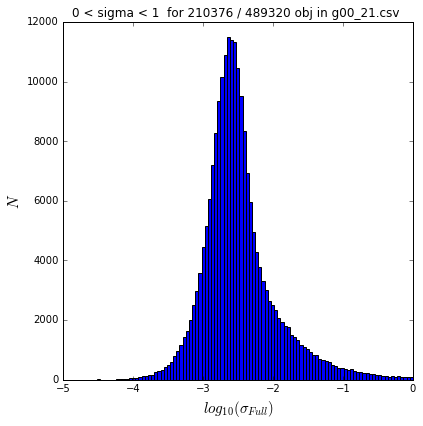

In [8]:
%matplotlib inline 
fig,ax = plt.subplots(1,1, figsize=(6,6))
ax.hist(np.log10(varMetricsSig['sigmaFull']), bins=100)
ax.set_ylabel(r'$N$',fontsize=15)
ax.set_xlabel(r'$log_{10}(\sigma_{Full})$', fontsize=15)
ax.set_title(r'0 < sigma < %d  for %d / %d obj in g00_21.csv ' %(sigMax, np.sum(m1),len(m1)), fontsize=12)
plt.tight_layout()

plt.savefig('Varg00_21_1000_bootstraps_sigma.png')

In [16]:
len(varMetricsSig['muFull'])

210376

In [17]:
max(varMetricsSig['sigmaFull'])

0.99840272222499993

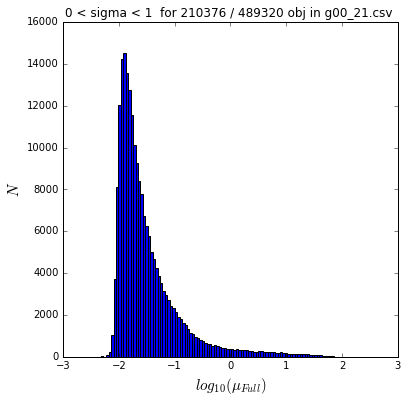

In [18]:
%matplotlib inline 
fig,ax = plt.subplots(1,1, figsize=(6,6))
ax.hist(np.log10(np.array(varMetricsSig['muFull'].values).astype(float)), bins=100)
ax.set_title(r'0 < sigma < %d  for %d / %d obj in g00_21.csv ' %(sigMax, np.sum(m1),len(m1)), fontsize=12)
ax.set_ylabel(r'$N$',fontsize=15)
ax.set_xlabel(r'$log_{10}(\mu_{Full})$', fontsize=15)
plt.savefig('Varg00_21_1000_bootstraps_mu.png')

In [19]:
# Select variable candidates  

m1 = (varMetricsFull['sigmaFull'] > 0).values  # 234883
m2 =  (varMetricsFull['chi2DOF'] > 1).values   # 346886
m3 = (varMetricsFull['chi2R'] > 1).values      # 172602
m= np.ma.mask_or(m3, np.ma.mask_or(m1,m2))
print('Out of %d objects,:\n'%len(m)) 
print('%d fulfill  sigma>0 OR chi2R>1 OR chi2DOF>1' % ( np.sum(m)))

# The  '3 sigma' definition (more strict) ...
N = varMetricsFull['N'] #  number of pts per lightcurve 
m4 = varMetricsFull['chi2DOF'] > (1 + 3.0 * np.sqrt(2 / N )) ##  170517
m5 = varMetricsFull['chi2R'] > (1 + 3.0 * np.sqrt(2 / N))   ## 37464
# one or the other   170534
print('Also, %d fulfill chi2R>1+3*sqrt(2/n) OR chi2DOF>1+3*sqrt(2/n) ' % (np.sum(m4|m5)))
print('Also, %d fulfill sigma > 0 OR  chi2R>1+3*sqrt(2/n) OR chi2DOF>1+3*sqrt(2/n) ' % (np.sum(m1|m4|m5)))
 # 265981   sigma OR  chi2R  OR chi2DOF 
print('Also, %d fulfill sigma > 0 AND [ chi2R>1+3*sqrt(2/n) OR chi2DOF>1+3*sqrt(2/n) ]' % (np.sum(m1*(m4|m5))))
#

m = m1*(m4|m5)
# Grab only those rows that correspond to variable objects...

varMetricsVarOnly = varMetricsFull[m]

Out of 490369 objects,:

428295 fulfill  sigma>0 OR chi2R>1 OR chi2DOF>1
Also, 235462 fulfill chi2R>1+3*sqrt(2/n) OR chi2DOF>1+3*sqrt(2/n) 
Also, 296312 fulfill sigma > 0 OR  chi2R>1+3*sqrt(2/n) OR chi2DOF>1+3*sqrt(2/n) 
Also, 151035 fulfill sigma > 0 AND [ chi2R>1+3*sqrt(2/n) OR chi2DOF>1+3*sqrt(2/n) ]


/Users/chris/anaconda/lib/python3.5/site-packages/pandas/computation/expressions.py:181: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


NameError: name 'varMetricsVarOnly' is not defined

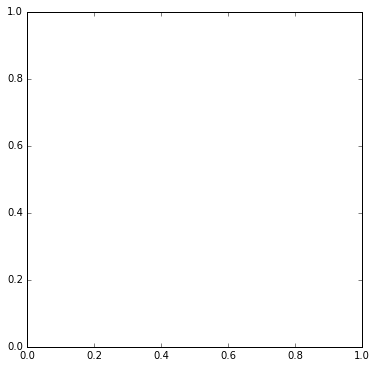

In [49]:
%matplotlib inline
# Plot some results : full LC : 
fig, ax = plt.subplots(figsize=(6,6))
xMin = 55
m4 = varMetricsVarOnly['N'].values  > xMin
lim = 10
m1=varMetricsVarOnly[m4]['chi2R'].values<lim
m2=varMetricsVarOnly[m4]['chi2DOF'].values<lim
m= m1*m2  # logical and 

H, xedges, yedges = np.histogram2d(varMetricsVarOnly[m4]['chi2R'].values[m],varMetricsVarOnly[m4]['chi2DOF'].values[m], bins=50)
H = np.rot90(H)
H = np.flipud(H)
# Mask zeros
Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zeropltssssss
# Plot 2D histogram using pcolor
ax.pcolormesh(xedges,yedges,np.log10(Hmasked), cmap='jet')
ax.plot(np.linspace(0,4), np.linspace(0,4), ls='--', lw=4)
ax.set_xlabel(r'$\chi^{2}_{R}$', fontsize=15)
ax.set_ylabel(r'$\chi^{2}_{DOF}$', fontsize=15)
ax.set_title('Unbinned lightcurve, N>%d, g00_21'%xMin)
#ax.set_xlim(0,lim)
#ax.set_ylim(0,lim)
ax.tick_params(axis='both', which='major', labelsize=15) 
plt.tight_layout()
plt.savefig('Varg00_21_10000_bootstraps_Chi2R_vs_Chi2DOF_yMax_10_VarOnly.png')

## Group by number of observation points... 

This plot has 486262 of 490369  objects in g00_21.csv 


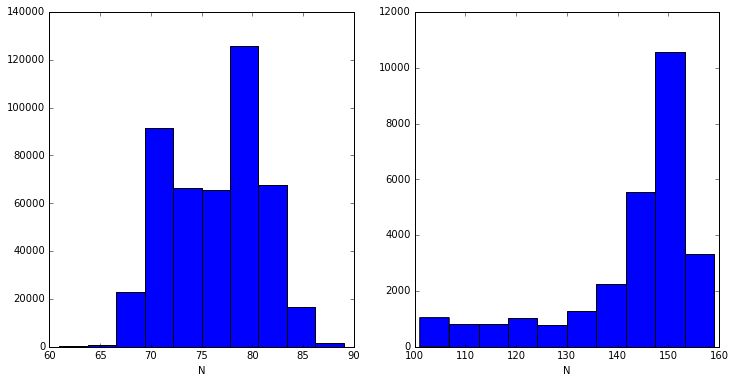

In [17]:
# Split all objects by the number of observation points ... 
# Nsmall  Nlarge 

%matplotlib inline


fig,ax = plt.subplots(1,2, figsize=(12,6))

m1 = (  60 < varMetricsFull['N'] ) & ( varMetricsFull['N'] < 90)
n1 = len(varMetricsFull['N'][m1].values)
ax[0].hist(varMetricsFull['N'][m1])
#plt.title('N> %d for %d of %d in g00_21.csv'%(xMin, np.sum(m),len(m) ))
#plt.xlim(60,170)
ax[0].set_xlabel('N')

m2 = (  100 < varMetricsFull['N'] ) & ( varMetricsFull['N'] < 160)
n2 = len(varMetricsFull['N'][m2].values)
ax[1].hist(varMetricsFull['N'][m2])
ax[1].set_xlabel('N')

print('This plot has %d of %d  objects in g00_21.csv '%(n1+n2, len(varMetricsFull['N'].values) ))

In [52]:
m1 = (  60 < varMetricsFull['N'].values ) & ( varMetricsFull['N'].values < 90)
print(len(varMetricsFull[m1]['N'].values))
mR = varMetricsFull[m1]['chi2R'].values < 10 
print(np.sum(mR))
mDOF=varMetricsFull[m1]['chi2DOF'].values<10
print(np.sum(mDOF))
m = mR & mDOF
print(len(varMetricsFull[m1]['N'].values[m]))


458781
458025
443775
443775


In [45]:
np.sum(mDOF)

443775

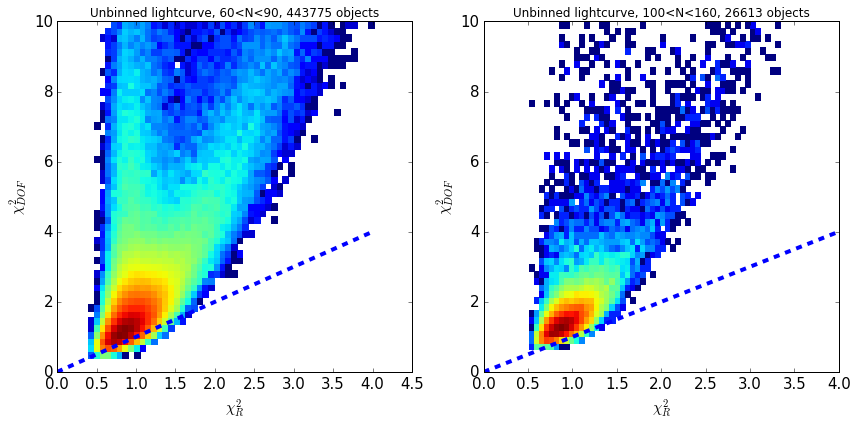

In [55]:
%matplotlib inline
# Plot some results : full LC : 
fig, ax = plt.subplots(1,2, figsize=(12,6))

lim = 10
# m1 selects objects with  N_min < N < N_max , 
# as specified above 


# left : m1   (small Number of obs )
m1 = (  60 < varMetricsFull['N'].values ) & ( varMetricsFull['N'].values < 90)
mR = varMetricsFull[m1]['chi2R'].values < lim
mDOF=varMetricsFull[m1]['chi2DOF'].values < lim
m= mR & mDOF  # logical and 
nObj = len(varMetricsFull[m1]['chi2R'].values[m])
H, xedges, yedges = np.histogram2d(varMetricsFull[m1]['chi2R'].values[m],varMetricsFull[m1]['chi2DOF'].values[m], bins=50)
H = np.rot90(H)
H = np.flipud(H)
# Mask zeros
Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zeropltssssss
# Plot 2D histogram using pcolor
ax[0].pcolormesh(xedges,yedges,np.log10(Hmasked), cmap='jet')
ax[0].plot(np.linspace(0,4), np.linspace(0,4), ls='--', lw=4)
ax[0].set_xlabel(r'$\chi^{2}_{R}$', fontsize=15)
ax[0].set_ylabel(r'$\chi^{2}_{DOF}$', fontsize=15)
ax[0].set_title('Unbinned lightcurve, %d<N<%d, %d objects'%(60,90,nObj))
#ax.set_xlim(0,lim)
#ax.set_ylim(0,lim)
ax[0].tick_params(axis='both', which='major', labelsize=15) 


# right  : m2 : large N points 
m2 = (  100 < varMetricsFull['N'].values ) & ( varMetricsFull['N'].values < 160)
mR = varMetricsFull[m2]['chi2R'].values < lim
mDOF=varMetricsFull[m2]['chi2DOF'].values < lim
m= mR & mDOF  # logical and 
nObj = len(varMetricsFull[m2]['chi2R'].values[m])
H, xedges, yedges = np.histogram2d(varMetricsFull[m2]['chi2R'].values[m],varMetricsFull[m2]['chi2DOF'].values[m], bins=50)
H = np.rot90(H)
H = np.flipud(H)
# Mask zeros
Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zeropltssssss
# Plot 2D histogram using pcolor
ax[1].pcolormesh(xedges,yedges,np.log10(Hmasked), cmap='jet')
ax[1].plot(np.linspace(0,4), np.linspace(0,4), ls='--', lw=4)
ax[1].set_xlabel(r'$\chi^{2}_{R}$', fontsize=15)
ax[1].set_ylabel(r'$\chi^{2}_{DOF}$', fontsize=15)
ax[1].set_title('Unbinned lightcurve, %d<N<%d, %d objects'%(100,160, nObj))
#ax.set_xlim(0,lim)
#ax.set_ylim(0,lim)
ax[1].tick_params(axis='both', which='major', labelsize=15) 

plt.tight_layout()
#plt.savefig('Varg00_21_1000_bootstraps_Chi2R_vs_Chi2DOF_yMax_10.png')

In [63]:
# First, use only sigma between d 1 , other values are not really very informative... 
m1 = (  60 < varMetricsFull['N'].values ) & ( varMetricsFull['N'].values < 90)
mSig = (varMetricsFull[m1]['sigmaFull'].values < 1) & (varMetricsFull[m1]['sigmaFull'].values > 0)
varMetricsSig = varMetricsFull[m1][mSig]

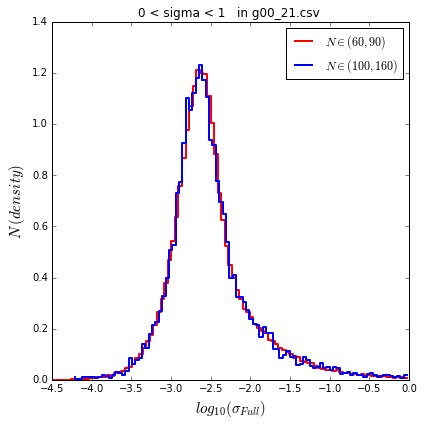

In [20]:
fig,ax = plt.subplots( figsize=(6,6))
nbins=100

m1 = (  60 < varMetricsFull['N'].values ) & ( varMetricsFull['N'].values < 90)
mSig = (varMetricsFull['sigmaFull'].values < 1) & (varMetricsFull['sigmaFull'].values > 0)
m = m1&mSig
varMetricsSig = varMetricsFull[m]
hist, bin_edges = np.histogram(np.log10(varMetricsSig['sigmaFull']), bins=nbins, density=True)
bin_cen = (bin_edges[:-1] + bin_edges[1:])/2
ax.plot(bin_cen, hist, color = 'red', ls='steps', lw=2, label=r'$N\in(60,90)$')

m2 = (  100 < varMetricsFull['N'].values ) & ( varMetricsFull['N'].values < 160)
mSig = (varMetricsFull['sigmaFull'].values < 1) & (varMetricsFull['sigmaFull'].values > 0)
m = m2&mSig
varMetricsSig = varMetricsFull[m]
hist, bin_edges = np.histogram(np.log10(varMetricsSig['sigmaFull']), bins=nbins, density=True)
bin_cen = (bin_edges[:-1] + bin_edges[1:])/2
ax.plot(bin_cen, hist, color = 'blue', ls='steps', lw=2, label=r'$N\in(100,160)$')

ax.set_ylabel(r'$N \,(density)$',fontsize=15)
ax.set_xlabel(r'$log_{10}(\sigma_{Full})$', fontsize=15)
ax.set_title(r'0 < sigma < 1   in g00_21.csv ' , fontsize=12)

#ax.set_xlim(-4.5,0)

ax.legend()

#ax[0].hist(np.log10(varMetricsSig['sigmaFull']), bins=100)

plt.tight_layout()
plt.savefig('Varg00_21_1000_bootstraps_sigma_hist_N_groups.png')

In [12]:
np.array(varMetricsSig['muFull'].values).astype(float)*1e27

array([  1.25934788e+25,   5.91039437e+26,   1.04757295e+25, ...,
         2.70294880e+25,   2.38215180e+25,   2.05027555e+25])

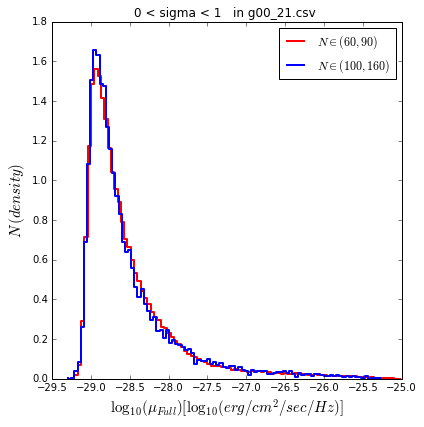

In [18]:
fig,ax = plt.subplots( figsize=(6,6))
nbins=100

m1 = (  60 < varMetricsFull['N'].values ) & ( varMetricsFull['N'].values < 90)
mSig = (varMetricsFull['sigmaFull'].values < 1) & (varMetricsFull['sigmaFull'].values > 0)
m = m1&mSig
varMetricsSig = varMetricsFull[m]
hist, bin_edges = np.histogram(np.log10(1e-27*np.array(varMetricsSig['muFull'].values).astype(float)), bins=nbins, density=True)
bin_cen = (bin_edges[:-1] + bin_edges[1:])/2
ax.plot(bin_cen, hist, color = 'red', ls='steps', lw=2, label=r'$N\in(60,90)$')

m2 = (  100 < varMetricsFull['N'].values ) & ( varMetricsFull['N'].values < 160)
mSig = (varMetricsFull['sigmaFull'].values < 1) & (varMetricsFull['sigmaFull'].values > 0)
m = m2&mSig
varMetricsSig = varMetricsFull[m]
hist, bin_edges = np.histogram(np.log10(1e-27*np.array(varMetricsSig['muFull'].values).astype(float)), bins=nbins, density=True)
bin_cen = (bin_edges[:-1] + bin_edges[1:])/2
ax.plot(bin_cen, hist, color = 'blue', ls='steps', lw=2, label=r'$N\in(100,160)$')

ax.set_ylabel(r'$N \,(density)$',fontsize=15)
ax.set_xlabel(r'$\log_{10}(\mu_{Full}) \, [\log_{10}(erg/cm^{2}/sec/Hz )]$', fontsize=15)
ax.set_title(r'0 < sigma < 1   in g00_21.csv ' , fontsize=12)

#ax.set_xlim(-4.5,0)

ax.legend()

#ax[0].hist(np.log10(varMetricsSig['sigmaFull']), bins=100)

plt.tight_layout()

#ax.hist(np.log10(np.array(varMetricsSig['muFull'].values).astype(float)), bins=100)
#ax.set_title(r'0 < sigma < %d  for %d / %d obj in g00_21.csv ' %(sigMax, np.sum(m1),len(m1)), fontsize=12)
#ax.set_ylabel(r'$N$',fontsize=15)
#ax.set_xlabel(r'$log_{10}(\mu_{Full})$', fontsize=15)

plt.savefig('Varg00_21_1000_bootstraps_mu_hist_N_groups.png')

In comparison, I see nothing special in the structue of objects observed multiple times as opposed to those observed only few times...  (the plot is normalized so that the area under the histogram is 1  : np.sum(hist * (bin_edges[1] - bin_edges[0])) = 1 )

## Group by log10(sigma) and g magnitude 

(array([  7.20000000e+01,   5.16000000e+02,   1.11600000e+03,
          1.87400000e+03,   3.14000000e+03,   4.77300000e+03,
          1.02850000e+04,   3.11050000e+04,   1.13627000e+05,
          3.23861000e+05]),
 array([ 10.67860337,  12.10490633,  13.5312093 ,  14.95751226,
         16.38381523,  17.8101182 ,  19.23642116,  20.66272413,
         22.08902709,  23.51533006,  24.94163302]),
 <a list of 10 Patch objects>)

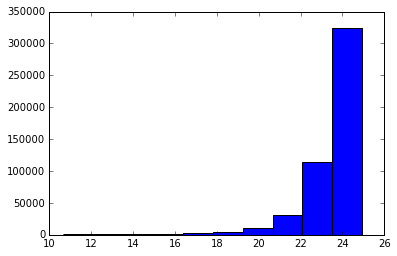

In [91]:
%matplotlib inline 
plt.hist(varMetricsFull['psfMean'].values)

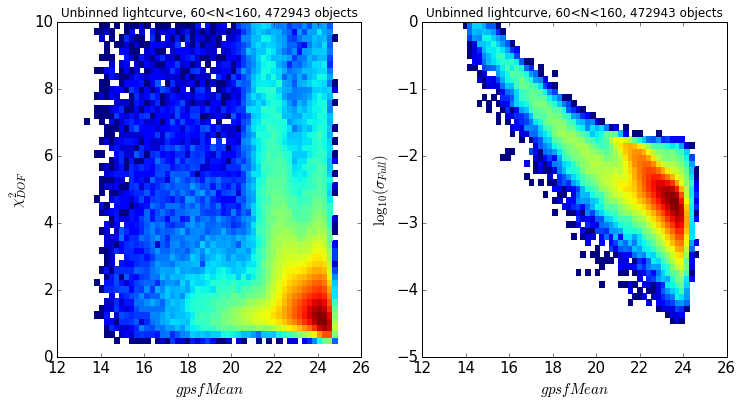

In [21]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

lim = 10
# m1 selects objects with  N_min < N < N_max , 
# as specified above 

# left : m1   (small Number of obs )
#m1 = (  60 < varMetricsFull['N'].values ) & ( varMetricsFull['N'].values < 90)
m1 = (  60 < varMetricsFull['N'].values ) & ( varMetricsFull['N'].values < 160)
mR = varMetricsFull['chi2R'].values < lim
mDOF=varMetricsFull['chi2DOF'].values < lim
mChi2= mR & mDOF  # logical and 
m = mChi2&m1
nObj = len(varMetricsFull['chi2R'].values[m])
H, xedges, yedges = np.histogram2d(varMetricsFull['psfMean'].values[m],varMetricsFull['chi2DOF'].values[m], bins=50)
H = np.rot90(H)
H = np.flipud(H)
# Mask zeros
Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zeropltssssss
# Plot 2D histogram using pcolor
ax[0].pcolormesh(xedges,yedges,np.log10(Hmasked), cmap='jet')
#ax.plot(np.linspace(0,4), np.linspace(0,4), ls='--', lw=4)
ax[0].set_xlabel(r'$gpsfMean$', fontsize=15)
ax[0].set_ylabel(r'$\chi^{2}_{DOF}$', fontsize=15)
ax[0].set_title('Unbinned lightcurve, %d<N<%d, %d objects'%(60,160,nObj))
#ax.set_xlim(0,lim)
#ax.set_ylim(0,lim)
ax[0].tick_params(axis='both', which='major', labelsize=15) 

mSig = (varMetricsFull['sigmaFull'].values < 1) & (varMetricsFull['sigmaFull'].values > 0)
m = m & mSig
H, xedges, yedges = np.histogram2d(varMetricsFull['psfMean'].values[m],np.log10(varMetricsFull['sigmaFull'].values[m]), bins=50)
H = np.rot90(H)
H = np.flipud(H)
# Mask zeros
Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zeropltssssss
# Plot 2D histogram using pcolor
ax[1].pcolormesh(xedges,yedges,np.log10(Hmasked), cmap='jet')
#ax.plot(np.linspace(0,4), np.linspace(0,4), ls='--', lw=4)
ax[1].set_xlabel(r'$gpsfMean$', fontsize=15)
ax[1].set_ylabel(r'$\log_{10}{(\sigma_{Full})}$', fontsize=15)
ax[1].set_title('Unbinned lightcurve, %d<N<%d, %d objects'%(60,160,nObj))
#ax.set_xlim(0,lim)
#ax.set_ylim(0,lim)
ax[1].tick_params(axis='both', which='major', labelsize=15) 

plt.savefig('Varg00_21_1000_bootstraps_chi2DOF_sigFull_gMag.png')


Since it seems that Nobs does not affect chi2 nor sigma or mu properties,  in this exercise I only bin by sigmaFull,  and then by magnitudes 

In [8]:
m1 = (  60 < varMetricsFull['N'].values ) & ( varMetricsFull['N'].values < 160)
mR = varMetricsFull['chi2R'].values < lim
mDOF=varMetricsFull['chi2DOF'].values < lim
mChi2= mR & mDOF  # logical and 
mPre = mChi2&m1 

i=0
j=0

mSig = (np.log10(varMetricsFull['sigmaFull'].values) < log10SigLims[i+1] ) & \
       (np.log10(varMetricsFull['sigmaFull'].values) > log10SigLims[i])
mMag = (varMetricsFull['psfMean'].values < gMagLims[j+1]) & \
       (varMetricsFull['psfMean'].values > gMagLims[j])
mPanel = mSig & mMag
m = mPre & mPanel
        
        
np.sum(m)

2

2110

In [9]:
m1 = (  60 < varMetricsFull['N'].values ) & ( varMetricsFull['N'].values < 160)
mR = varMetricsFull['chi2R'].values < lim
mDOF=varMetricsFull['chi2DOF'].values < lim
mChi2= mR & mDOF  # logical and 
mComm = mChi2&m1
#print(np.sum(mComm))
for i in range(x):
    
    for j in range(y):
        
        mSig = (np.log10(varMetricsFull['sigmaFull'].values) < log10SigLims[i+1] ) & \
              (np.log10(varMetricsFull['sigmaFull'].values) > log10SigLims[i])
        mMag = (varMetricsFull['psfMean'].values < gMagLims[j+1]) & \
               (varMetricsFull['psfMean'].values > gMagLims[j])
        print('%.2f < log10(Sigma) < %.2f : %d'%(log10SigLims[i],log10SigLims[i+1],np.sum(mSig)))
        print('%.2f < gpsfMean (g mag) < %.2f : %d'%(gMagLims[j], gMagLims[j+1],np.sum(mMag))) 
        mPanel = mSig & mMag
        print('Set intersection: %d'%np.sum(mPanel))
        mPanel = mPanel & mComm
        print('Impose N and chi2 cut: %d'%np.sum(mPanel))
        print('\n')

NameError: name 'x' is not defined

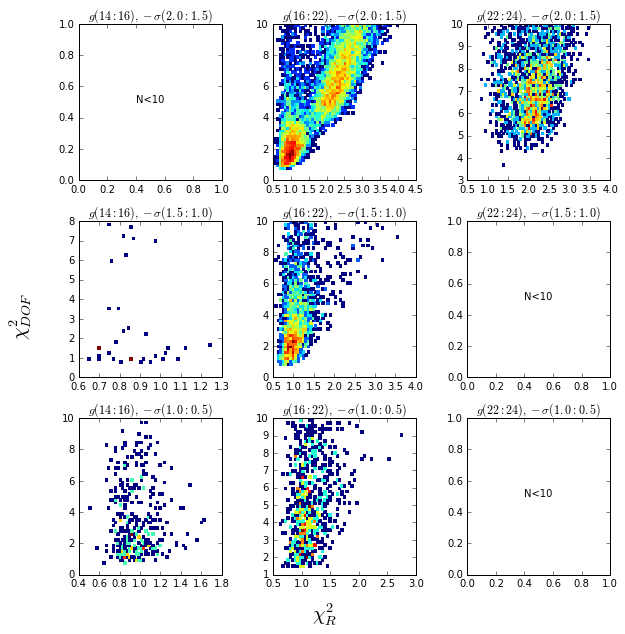

In [22]:
# select N in 60-160 range 
from matplotlib import rcParams
rcParams['text.usetex']=False
%matplotlib inline 
log10SigLims = [-2,-1.5,-1,-.5]
gMagLims = [14,16,22,24]

m1 = (  60 < varMetricsFull['N'].values ) & ( varMetricsFull['N'].values < 160)
mR = varMetricsFull['chi2R'].values < lim
mDOF=varMetricsFull['chi2DOF'].values < lim
mChi2= mR & mDOF  # logical and 
mComm = mChi2&m1  # common to all panels 

nObj = len(varMetricsFull['chi2R'].values[m])

# in each Sigma - Mag bin, plot chi2R vs  chi2DOF 
x = len(log10SigLims)-1
y = len(gMagLims)-1

fig,ax = plt.subplots(x, y, figsize=(3*x,3*y))
for i in range(x):
    for j in range(y):
        mSig = (np.log10(varMetricsFull['sigmaFull'].values) < log10SigLims[i+1] ) & \
               (np.log10(varMetricsFull['sigmaFull'].values) > log10SigLims[i])
        mMag = (varMetricsFull['psfMean'].values < gMagLims[j+1]) & \
               (varMetricsFull['psfMean'].values > gMagLims[j])
        mPanel = mSig & mMag
        m = mComm & mPanel
        ax[i,j].set_title(r'$g(%d:%d), -\sigma(%.1f:%.1f)$'%(gMagLims[j],gMagLims[j+1],-log10SigLims[i],-log10SigLims[i+1]))
        if np.sum(m) >  10 : 
            H, xedges, yedges = np.histogram2d(varMetricsFull['chi2R'].values[m],varMetricsFull['chi2DOF'].values[m], bins=50)
            H = np.rot90(H)
            H = np.flipud(H)
            # Mask zeros
            Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zeropltssssss
            # Plot 2D histogram using pcolor
            ax[i,j].pcolormesh(xedges,yedges,np.log10(Hmasked), cmap='jet')
        else : 
            ax[i,j].text(0.4,0.5, 'N<10')

#fig.text(0.25,0.9, str(gMagLims[0])+'<g<'+str(gMagLims[1]))                 
fig.text(0.5, 0.04, r'$\chi^{2}_{R}$', ha='center', va='center',fontsize=20)
fig.text(0.03, 0.5, r'$\chi^{2}_{DOF}$', ha='center', va='center', rotation='vertical',fontsize=20)

#fig.tight_layout()
fig.subplots_adjust(wspace=0.36, hspace=0.26, left=0.12, right=0.94, bottom=0.10, top=0.95)

plt.savefig('Varg00_21_1000_bootstraps_chi2DOF_chi2R_mag_sigma_bins.png')

## Plots like Sesar+2007 Fig.3 

Paper : http://www.astro.washington.edu/users/ivezic/Publications/Sesar07.pdf 

    Hard to do, because here I only have g magnitudes... Would have to have results from all 5 filters to make the color-color magnitudes...

## Bootstrap comparison (10000 vs 1000)....

In [21]:
# Compare sigma with 10000 bootstraps compared to 1000 bootstraps  
DirIn  = '/astro/store/scratch/tmp/suberlak/s13_stripe82/forced_phot_lt_23/NCSA/Var/'
name ='Varg00_21_10000_bootstraps.csv'
varMetrics1e4 = pd.read_csv(DirIn+name)
name ='Varg00_21_1000_bootstraps.csv'
varMetrics1e3 = pd.read_csv(DirIn+name)



OSError: File b'/astro/store/scratch/tmp/suberlak/s13_stripe82/forced_phot_lt_23/NCSA/Var/Varg00_21_10000_bootstraps.csv' does not exist

In [22]:
varMetricsJoin =  pd.merge(varMetrics1e3, varMetrics1e4, how='left', on='objectId',left_index=False, right_index=False, sort=True,
      suffixes=('_x', '_y'), copy=True)


In [23]:
varMetricsJoin[['sigmaFull_x','sigmaFull_y' ]].head()

,sigmaFull_x,sigmaFull_y
0,0.003416,0.003590
1,0.003350,0.003318
2,0.000000,0.000000
3,0.003079,0.003449
4,0.004473,0.004695


In [24]:
xMin = 55
m = varMetricsJoin['N_x'].values  > xMin
m1=varMetricsJoin[m]['sigmaFull_x'].values>0
#m2=varMetricsJoin[m]['sigmaFull_y'].values>0
m3=varMetricsJoin[m]['sigmaFull_x'].values<1
#m4=varMetricsJoin[m]['sigmaFull_y'].values<1 
msk =m1*m3


varMetricsPlot = varMetricsJoin[m][msk]

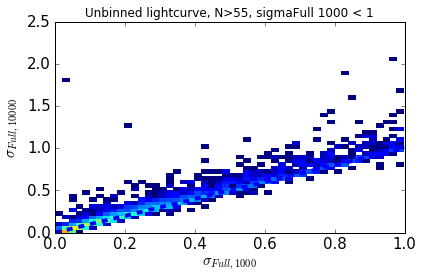

In [25]:
%matplotlib inline
# Plot some results : full LC : 
fig, ax = plt.subplots()

H, xedges, yedges = np.histogram2d(varMetricsPlot['sigmaFull_x'].values,varMetricsPlot['sigmaFull_y'].values, bins=50)
H = np.rot90(H)
H = np.flipud(H)
# Mask zeros
Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zeropltssssss
# Plot 2D histogram using pcolor
ax.pcolormesh(xedges,yedges,np.log10(Hmasked), cmap='jet')
ax.plot(np.linspace(0,1.5), np.linspace(0,1.5), ls='--', lw=4)
ax.set_xlabel(r'$\sigma_{Full, 1000}$', fontsize=15)
ax.set_ylabel(r'$\sigma_{Full, 10000}$', fontsize=15)
ax.set_title('Unbinned lightcurve, N>%d, sigmaFull 1000 < 1'%xMin)
ax.set_xlim(0,1)
#ax.set_ylim(0,lim)
ax.tick_params(axis='both', which='major', labelsize=15) 
plt.tight_layout()
plt.savefig('Varg00_21_bootstraps_compare_sigma.png')

In [26]:
x = np.abs(varMetricsPlot['sigmaFull_x'].values - varMetricsPlot['sigmaFull_y'].values) / varMetricsPlot['sigmaFull_x'].values

(array([  1.22608000e+05,   2.22600000e+04,   1.27300000e+04,
          8.86000000e+03,   6.72800000e+03,   5.19100000e+03,
          4.10300000e+03,   3.22200000e+03,   2.71000000e+03,
          2.28300000e+03,   1.87000000e+03,   1.53600000e+03,
          1.35600000e+03,   1.17200000e+03,   1.03300000e+03,
          9.02000000e+02,   8.34000000e+02,   7.26000000e+02,
          6.49000000e+02,   5.72000000e+02,   5.06000000e+02,
          4.68000000e+02,   4.03000000e+02,   3.86000000e+02,
          3.52000000e+02,   5.05000000e+02,   3.30000000e+02,
          2.94000000e+02,   2.35000000e+02,   2.37000000e+02,
          2.24000000e+02,   2.39000000e+02,   2.08000000e+02,
          2.08000000e+02,   1.56000000e+02,   1.37000000e+02,
          1.53000000e+02,   1.27000000e+02,   1.56000000e+02,
          1.33000000e+02,   1.28000000e+02,   1.12000000e+02,
          1.16000000e+02,   1.17000000e+02,   9.00000000e+01,
          9.00000000e+01,   9.10000000e+01,   7.10000000e+01,
        

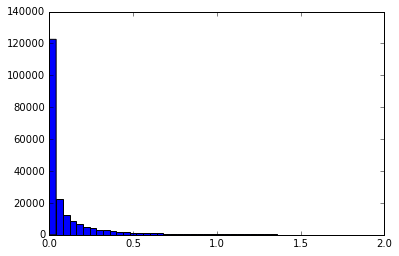

In [29]:
%matplotlib inline 
fig,ax = plt.subplots()
ax.hist(x[x<2], bins=50)

In [30]:
y = np.log10(varMetricsPlot['sigmaFull_x'].values / varMetricsPlot['sigmaFull_y'].values)

## varMetricsSeasonal : metrics for Seasons for full LC on g00_21.csv 

In [31]:
#  only for variable objects 
#     ( here : N=1000 bootstraps,  used strict variability definition 
#     m1*(m4 | m5), where  m1 = (varMetricsFull['sigmaFull'] > 0)
#      m4 = varMetricsFull['chi2DOF'] > (1 + 3.0 * np.sqrt(2 / N )) ##  170517
# m5 = varMetricsFull['chi2R'] > (1 + 3.0 * np.sqrt(2 / N))   )

In [32]:
DirIn  = '/astro/store/scratch/tmp/suberlak/s13_stripe82/forced_phot_lt_23/NCSA/Var/'
name = 'SeasVarg00_21_1000_bootstraps.csv'
varMetricsSeasonal= pd.read_csv(DirIn+name)

In [33]:
varMetricsSeasonal.head()

,objectId,season,N,avgMJD,chi2DOF,chi2R,flagLtTenPts,muFull,psfFluxMean,psfFluxMeanErr,psfFluxMedian,psfFluxMedianErr,psfFluxSigG,psfFluxSkew,psfFluxStDev,rangeMJD,sigmaFull
0,216172782516437336,0.0,13.0,52767.700160,2.201456,1.888938,NaN,0.015001399093876018,1.430169e-29,1.013931e-30,1.481434e-29,1.270774e-30,7.801653e-30,0.0,5.168289e-30,1532.757866,0.003422
1,216172782516437336,1.0,21.0,53667.596293,1.657391,0.974494,NaN,0.01577785650303653,1.567939e-29,1.231513e-30,1.687467e-29,1.543473e-30,8.669612e-30,0.0,5.946312e-30,82.891143,0.001552
2,216172782516437336,2.0,23.0,54028.141095,2.629647,1.276034,NaN,0.015562815870718573,1.528438e-29,1.115401e-30,1.884968e-29,1.397948e-30,9.055049e-30,0.0,5.610564e-30,92.921374,0.002257
3,216172782516437336,3.0,15.0,54395.611967,2.414379,1.270620,NaN,0.014557636730170884,1.349460e-29,1.214454e-30,1.704120e-29,1.522092e-30,6.241453e-30,0.0,6.736747e-30,64.959241,0.004777
4,216172782516437339,0.0,14.0,52777.885227,1.263577,0.836415,NaN,0.044455034371950274,4.434739e-29,1.070287e-30,4.384218e-29,1.341406e-30,3.851477e-30,0.0,4.493279e-30,1532.757866,0.001935


In [34]:
m = varMetricsSeasonal['chi2DOF'] < 10


(array([  7.22600000e+03,   1.69038000e+05,   2.40199000e+05,
          8.65880000e+04,   2.55660000e+04,   9.75600000e+03,
          3.68500000e+03,   1.15200000e+03,   2.14000000e+02,
          2.20000000e+01]),
 array([ 0.01523308,  0.48526884,  0.9553046 ,  1.42534036,  1.89537612,
         2.36541188,  2.83544764,  3.3054834 ,  3.77551916,  4.24555493,
         4.71559069]),
 <a list of 10 Patch objects>)

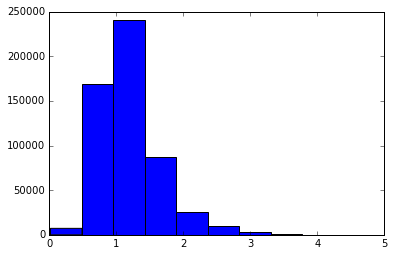

In [35]:
plt.hist(varMetricsSeasonal[m]['chi2R'].values)

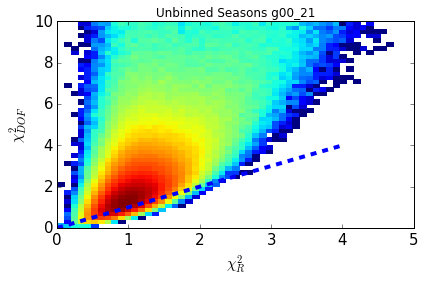

In [36]:
%matplotlib inline
# Plot some results : full LC : 
fig, ax = plt.subplots()

lim = 10
m1=varMetricsSeasonal['chi2R'].values<lim
m2=varMetricsSeasonal['chi2DOF'].values<lim
m= m1*m2  # logical and 

H, xedges, yedges = np.histogram2d(varMetricsSeasonal['chi2R'].values[m],varMetricsSeasonal['chi2DOF'].values[m], bins=50)
H = np.rot90(H)
H = np.flipud(H)
# Mask zeros
Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zeropltssssss
# Plot 2D histogram using pcolor
ax.pcolormesh(xedges,yedges,np.log10(Hmasked), cmap='jet')
ax.plot(np.linspace(0,4), np.linspace(0,4), ls='--', lw=4)
ax.set_xlabel(r'$\chi^{2}_{R}$', fontsize=15)
ax.set_ylabel(r'$\chi^{2}_{DOF}$', fontsize=15)
ax.set_title('Unbinned Seasons g00_21')
#ax.set_xlim(0,lim)
#ax.set_ylim(0,lim)
ax.tick_params(axis='both', which='major', labelsize=15) 
plt.tight_layout()
plt.savefig('SeasVarg00_21_1000_bootstraps_Chi2R_vs_Chi2DOF_yMax_10_VarOnly.png')

## varMetricsFullSeasonal : metrics for seasonally binned lightcurves 

In [37]:
DirIn  = '/astro/store/scratch/tmp/suberlak/s13_stripe82/forced_phot_lt_23/NCSA/Var/'
name = 'FullSeasVarg00_21_1000_bootstraps.csv'
varMetricsFullSeasonal= pd.read_csv(DirIn+name)

In [38]:
varMetricsFullSeasonal.head()

,objectId,Nseasons,chi2DOFmean,chi2DOFmedian,chi2Rmean,chi2Rmedian,muFull,psfFluxMeanErrMean,psfFluxMeanMean,sigmaFull
0,216172782516437336,4.0,0.681644,1.548436,0.845969,0.623895,0.014666,1.143825e-30,1.469002e-29,0.000000
1,216172782516437339,4.0,1.031613,0.230616,0.784815,0.324736,0.043201,1.213863e-30,4.300576e-29,0.000000
2,216172782516437346,4.0,0.874691,2.897802,0.627589,1.867501,0.011479,1.110731e-30,1.160085e-29,0.000000
3,216172782516437358,4.0,3.360890,5.273573,1.328345,1.499660,0.014187,1.121437e-30,1.432032e-29,0.001347
4,216172782516437360,4.0,1.442797,4.016759,1.010807,1.686722,0.009765,1.108440e-30,9.915796e-30,0.000303


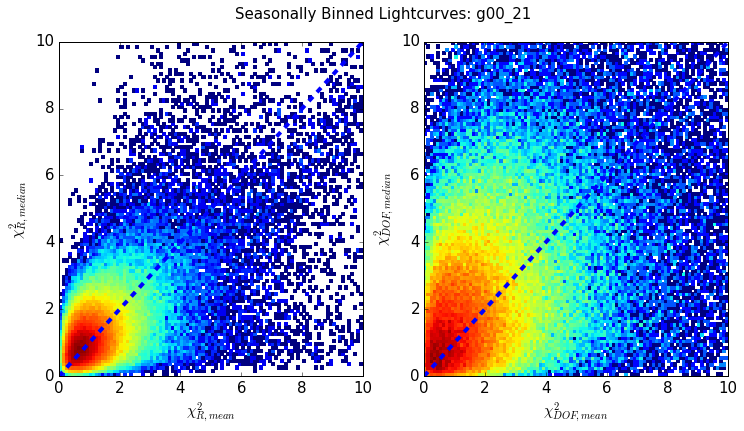

In [39]:
%matplotlib inline 

df = varMetricsFullSeasonal

from astroML.plotting import scatter_contour
#astroML.plotting.scatter_contour(x, y, levels=10, threshold=100, log_counts=False, histogram2d_args={}, plot_args={}, contour_args={}, ax=None)
fig, ax = plt.subplots(1,2,figsize=(12,6))
lim = 10

m1=df['chi2Rmean'].values<lim
m2=df['chi2Rmedian'].values<lim
m=m1*m2
#scatter_contour(seasonAvgChi2['chi2'].values[m], seasonAvgChi2['chi2R'].values[m] , threshold=200, 
#                log_counts=False, ax=ax)
#maskCol = (ri < xlim[1])&(ri>xlim[0])&(gr<ylim[1])&(gr>ylim[0])
nbins=100
H, xedges, yedges = np.histogram2d(df['chi2Rmean'].values[m],df['chi2Rmedian'].values[m],bins=nbins)
#H, xedges, yedges = np.histogram2d(grri_dropna[1],grri_dropna[0],bins=nbins)
# H needs to be rotated and flipped
H = np.rot90(H)
H = np.flipud(H)
# Mask zeros
Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zeropltssssss
# Plot 2D histogram using pcolor
ax[0].pcolormesh(xedges,yedges,np.log10(Hmasked), cmap='jet')
ax[0].plot(np.linspace(0,lim), np.linspace(0,lim), ls='--', lw=4)
ax[0].set_xlabel(r'$\chi^{2}_{R,mean}$', fontsize=15)
ax[0].set_ylabel(r'$\chi^{2}_{R, median}$', fontsize=15)
ax[0].set_xlim(0,lim)
ax[0].set_ylim(0,lim)
ax[0].tick_params(axis='both', which='major', labelsize=15)  

lim = 10
m1=df['chi2DOFmean'].values<lim
m2=df['chi2DOFmedian'].values<lim
m=m1*m2
#scatter_contour(seasonAvgChi2['chi2'].values[m], seasonAvgChi2['chi2R'].values[m] , threshold=200, 
#                log_counts=False, ax=ax)
#maskCol = (ri < xlim[1])&(ri>xlim[0])&(gr<ylim[1])&(gr>ylim[0])
nbins=100
H, xedges, yedges = np.histogram2d(df['chi2DOFmean'].values[m],df['chi2DOFmedian'].values[m],bins=nbins)
#H, xedges, yedges = np.histogram2d(grri_dropna[1],grri_dropna[0],bins=nbins)
# H needs to be rotated and flipped
H = np.rot90(H)
H = np.flipud(H)
# Mask zeros
Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zeropltssssss
# Plot 2D histogram using pcolor
ax[1].pcolormesh(xedges,yedges,np.log10(Hmasked), cmap='jet')
ax[1].plot(np.linspace(0,lim), np.linspace(0,lim), ls='--', lw=4)
ax[1].set_xlabel(r'$\chi^{2}_{DOF,mean}$', fontsize=15)
ax[1].set_ylabel(r'$\chi^{2}_{DOF, median}$', fontsize=15)
ax[1].set_xlim(0,lim)
ax[1].set_ylim(0,lim)
ax[1].tick_params(axis='both', which='major', labelsize=15) 
fig.subplots_adjust( top=0.90)
fig.suptitle('Seasonally Binned Lightcurves: g00_21', fontsize=15)

#plt.tight_layout()
plt.savefig('FullSeasVarg00_21_1000_bootstraps_Chi2R_vs_Chi2DOF.png')

In [43]:
np.shape(H)

(100, 100)

In [44]:
np.shape(xedges)

(101,)